In [13]:
import pandas as pd

# Load the startup funding dataset
df = pd.read_csv('startup__funding.csv', encoding='latin1')

# Display the first 5 rows
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [14]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [16]:
df.rename(columns={
    'Date dd/mm/yyyy': 'Date',
    'Startup Name': 'Startup',
    'Industry Vertical': 'Industry',
    'SubVertical': 'Subvertical',
    'City  Location': 'City',
    'Investors Name': 'Investor',
    'InvestmentnType': 'InvestmentType',
    'Amount in USD': 'AmountUSD'
}, inplace=True)

df.columns

Index(['Sr No', 'Date', 'Startup', 'Industry', 'Subvertical', 'City',
       'Investor', 'InvestmentType', 'AmountUSD', 'Remarks'],
      dtype='object')

In [17]:
df.columns

Index(['Sr No', 'Date', 'Startup', 'Industry', 'Subvertical', 'City',
       'Investor', 'InvestmentType', 'AmountUSD', 'Remarks'],
      dtype='object')

In [18]:
# Remove commas and convert to numeric (ignore errors like 'Undisclosed')
df['AmountUSD'] = df['AmountUSD'].str.replace(',', '')
df['AmountUSD'] = pd.to_numeric(df['AmountUSD'], errors='coerce')

# Check if it worked
df[['AmountUSD']].head()

,AmountUSD
0,200000000.0
1,8048394.0
2,18358860.0
3,3000000.0
4,1800000.0


In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if it worked
df[['Date']].head()

,Date
0,2020-09-01
1,NaT
2,2020-09-01
3,2020-02-01
4,2020-02-01


In [20]:
df.isnull().sum()

,0
Sr No,0
Date,1752
Startup,0
Industry,171
Subvertical,936
City,180
Investor,24
InvestmentType,4
AmountUSD,979
Remarks,2625


In [21]:
df = df.dropna(subset=['AmountUSD', 'City'])

df.shape

(1930, 10)

In [23]:
df['City'] = df['City'].str.strip().str.lower()

df['City'] = df['City'].replace({
    'bangalore': 'bengaluru',
    'new delhi': 'delhi',
    'gurgaon': 'gurugram',
    'noida': 'delhi'
})

In [22]:
top_cities = df['City'].value_counts().head(10)
top_cities

,count
City,
Bangalore,456
Mumbai,401
New Delhi,241
Gurgaon,198
Bengaluru,126
Chennai,75
Hyderabad,72
Pune,71
Noida,55


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

/tmp/ipython-input-25-581059776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_d')


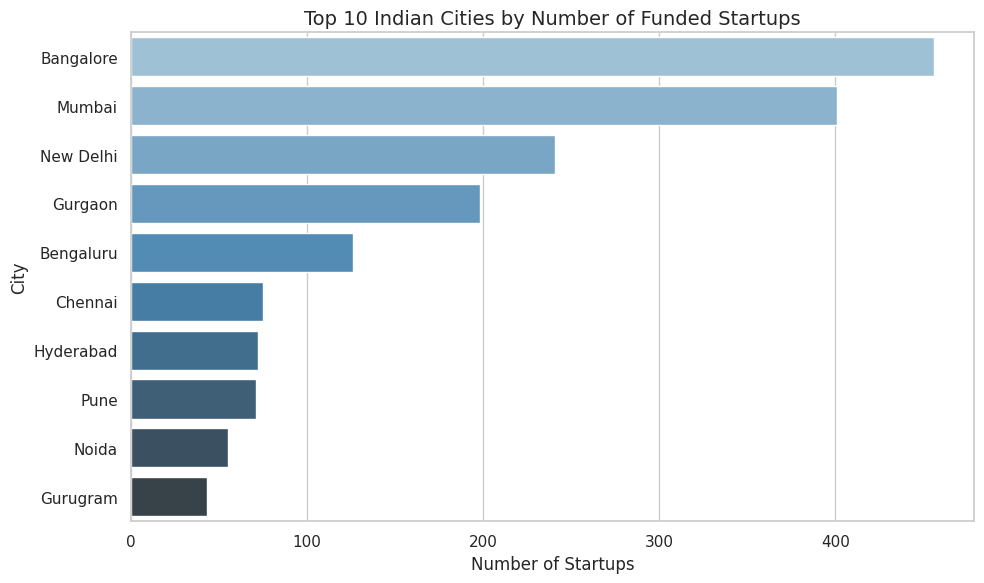

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_d')

plt.title("Top 10 Indian Cities by Number of Funded Startups", fontsize=14)
plt.xlabel("Number of Startups")
plt.ylabel("City")
plt.tight_layout()
plt.show()

/tmp/ipython-input-26-3090707591.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette=colors)
/tmp/ipython-input-26-3090707591.py:9: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_cities.values, y=top_cities.index, palette=colors)


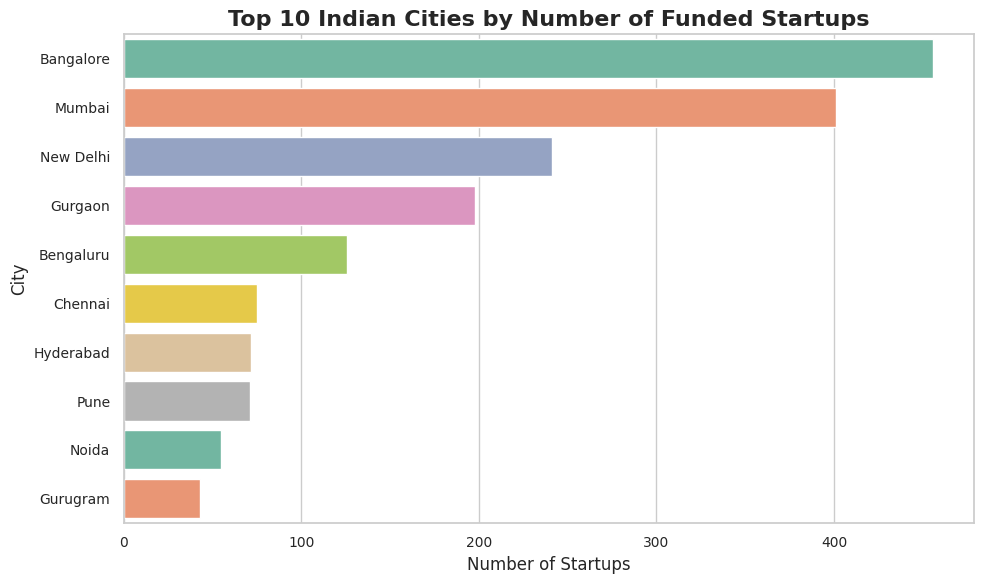

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

colors = sns.color_palette("Set2")

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette=colors)

plt.title("Top 10 Indian Cities by Number of Funded Startups", fontsize=16, fontweight='bold')
plt.xlabel("Number of Startups", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [27]:
df['Year'] = df['Date'].dt.year

funding_by_year = df.groupby('Year')['AmountUSD'].sum().reset_index()

funding_by_year = funding_by_year.sort_values('Year')

funding_by_year

,Year,AmountUSD
0,2015.0,3.159137e+09
1,2016.0,1.527942e+09
2,2017.0,4.702502e+09
3,2018.0,2.301148e+09
4,2019.0,2.854098e+09
5,2020.0,3.731589e+08


/tmp/ipython-input-28-2787154145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='AmountUSD', data=funding_by_year, palette='husl')


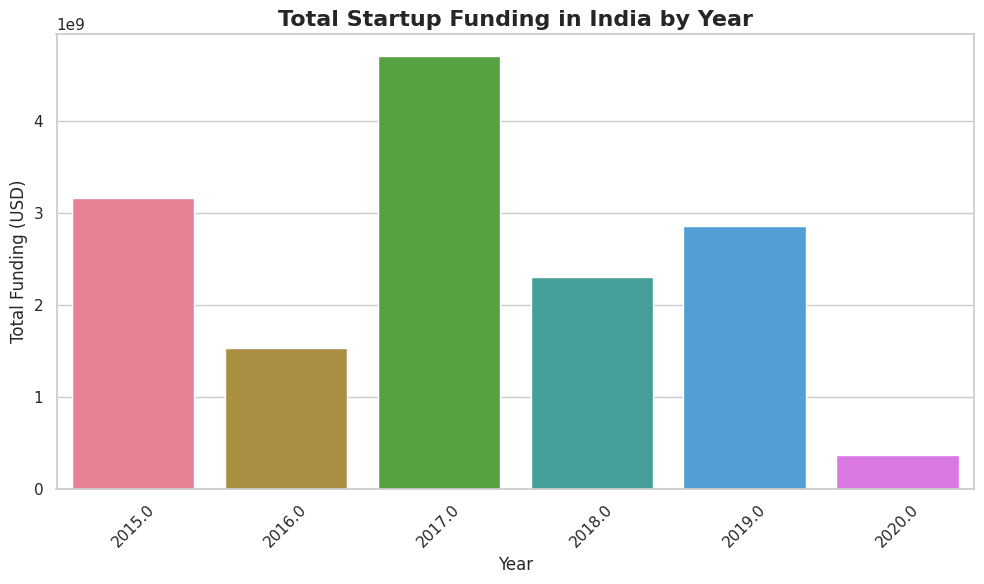

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='AmountUSD', data=funding_by_year, palette='husl')

plt.title("Total Startup Funding in India by Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Funding (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
top_industries = df['Industry'].str.strip().str.lower().value_counts().head(10)
top_industries

,count
Industry,
consumer internet,588
technology,310
ecommerce,170
finance,57
healthcare,45
e-commerce,34
logistics,23
education,19
food & beverage,15


/tmp/ipython-input-30-1232618792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="Set3")


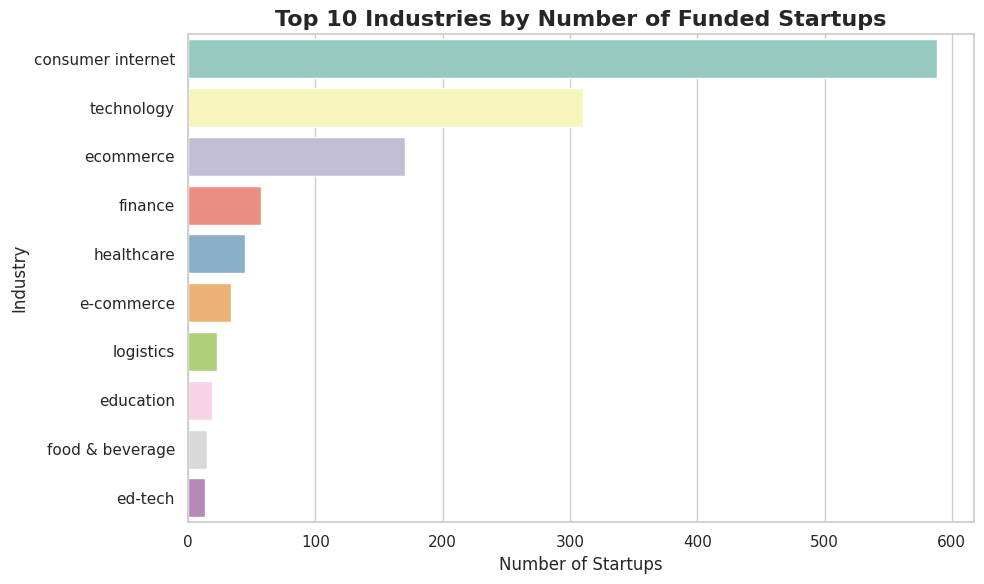

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="Set3")

plt.title("Top 10 Industries by Number of Funded Startups", fontsize=16, fontweight='bold')
plt.xlabel("Number of Startups", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
df['Date'].min(), df['Date'].max()

(Timestamp('2015-01-05 00:00:00'), Timestamp('2020-10-01 00:00:00'))